In [1]:
import torch
import matplotlib.pyplot as plt
from cornucopia.utils.py import meshgrid_ij
import cornucopia.functional as ccf

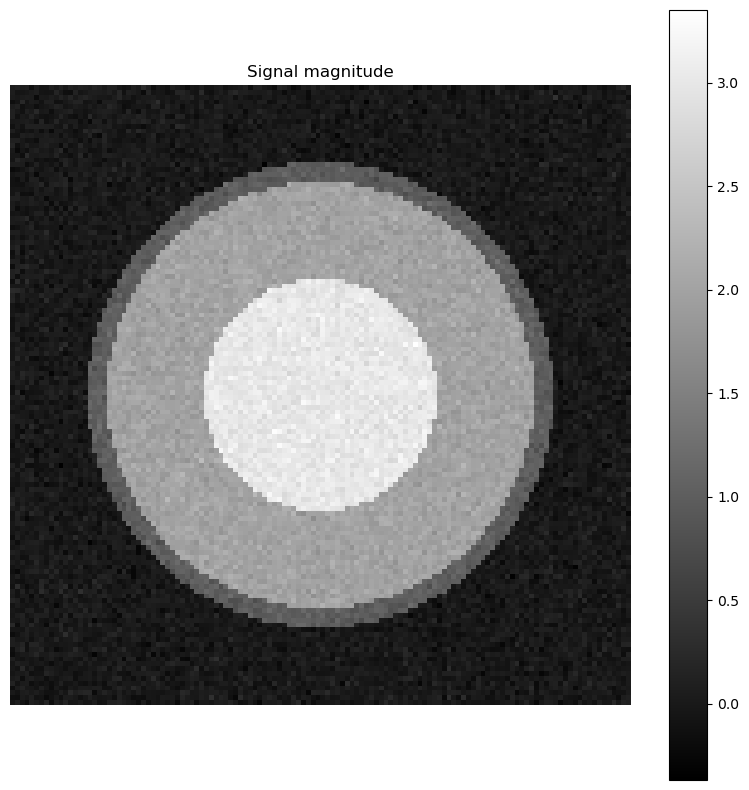

In [2]:
shape = [128, 128]
radius = torch.stack(meshgrid_ij(*[torch.arange(s).float() for s in shape]), -1)
radius -= (torch.as_tensor(shape).float() - 1) / 2
radius = radius.square().sum(-1).sqrt()

mag = torch.zeros_like(radius, dtype=torch.float32)
mag[radius < 48] = 1
mag[radius < 44] = 2
mag[radius < 24] = 3
mag = mag[None]  # channels dimension

mag += torch.randn_like(mag) * 0.1

plt.figure(figsize=(10, 10))
plt.imshow(mag.squeeze(), cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Signal magnitude')
plt.colorbar()
plt.show()


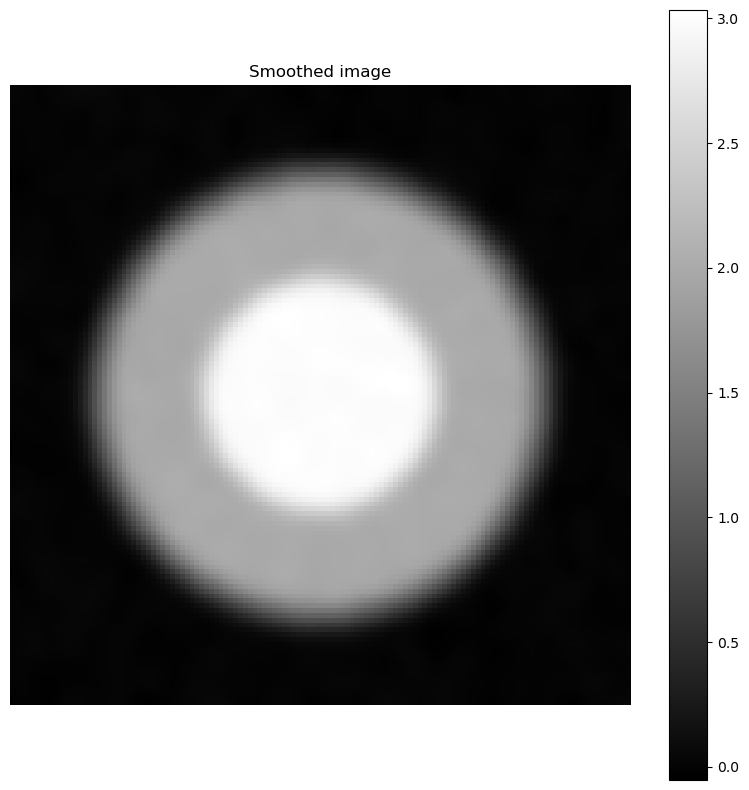

In [3]:
smo = ccf.smooth(mag, 5)

plt.figure(figsize=(10, 10))
plt.imshow(smo.squeeze(), cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Smoothed image')
plt.colorbar()
plt.show()

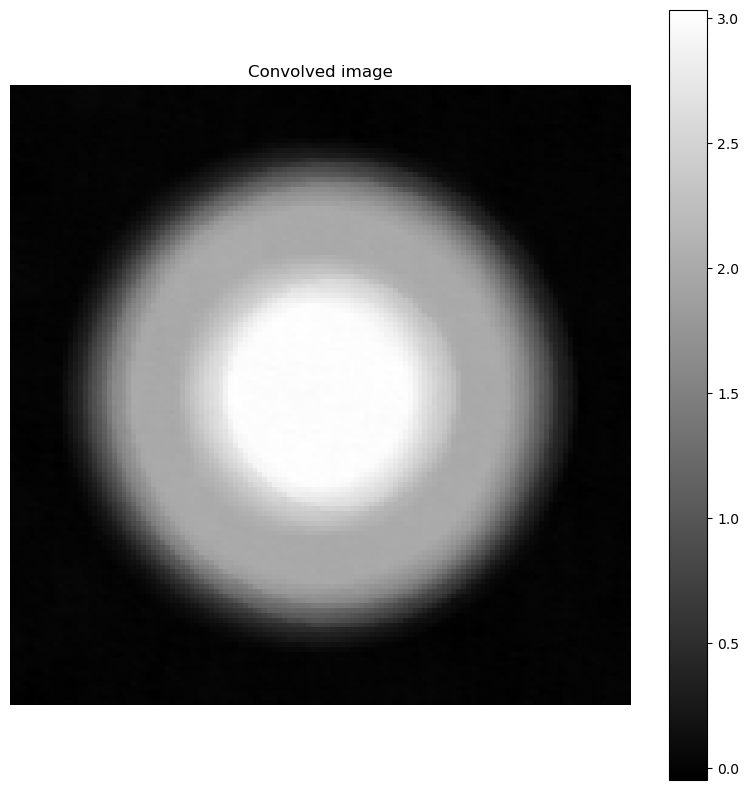

In [212]:
ker = ccf.random_kernel([1, 11, 11], distrib="lognormal")

conv = ccf.conv(mag, ker)

plt.figure(figsize=(10, 10))
plt.imshow(conv.squeeze(), cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Convolved image')
plt.colorbar()
plt.show()

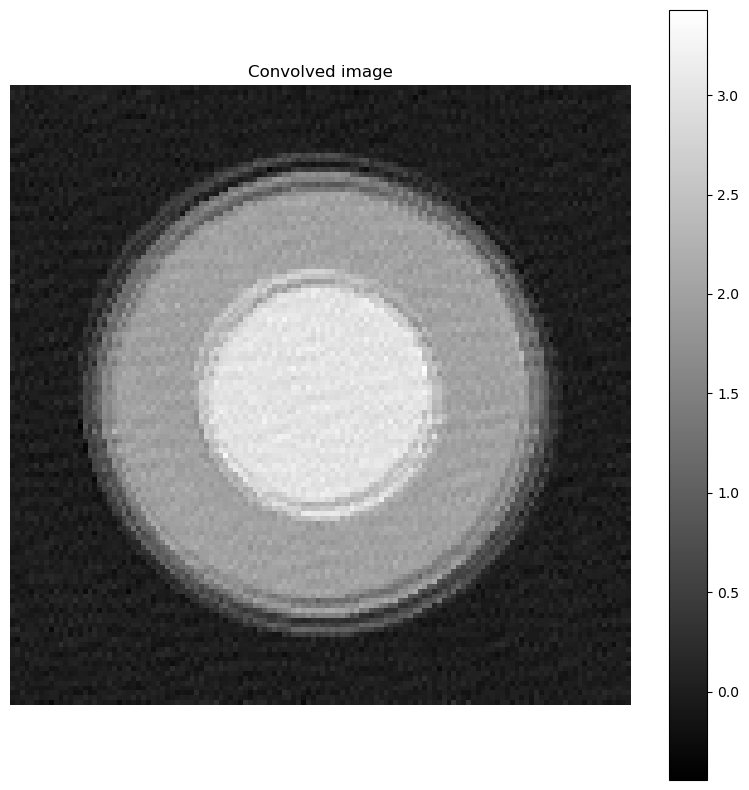

In [155]:
ker = ccf.random_kernel([1, 5, 5], zero_mean=True, distrib="gaussian")

conv = ccf.conv(mag, ker)

plt.figure(figsize=(10, 10))
plt.imshow(conv.squeeze(), cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Convolved image')
plt.colorbar()
plt.show()

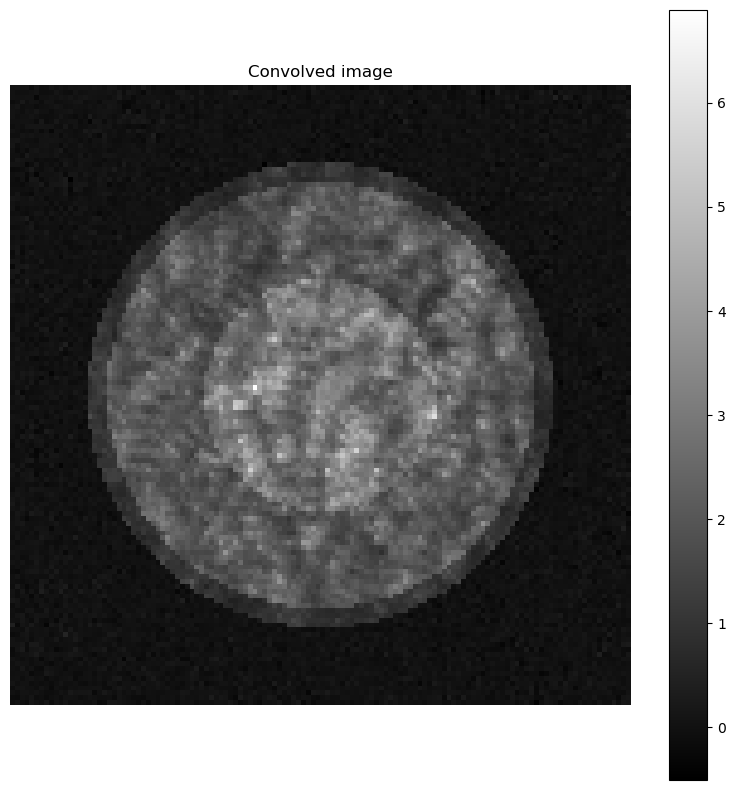

In [269]:
ker = ccf.random_kernel([1, 5, 5], allow_translations=True)
eps = ccf.random_field_gamma(mag.shape)
eps = ccf.conv(eps, ker)

conv = mag * eps

plt.figure(figsize=(10, 10))
plt.imshow(conv.squeeze(), cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Convolved image')
plt.colorbar()
plt.show()

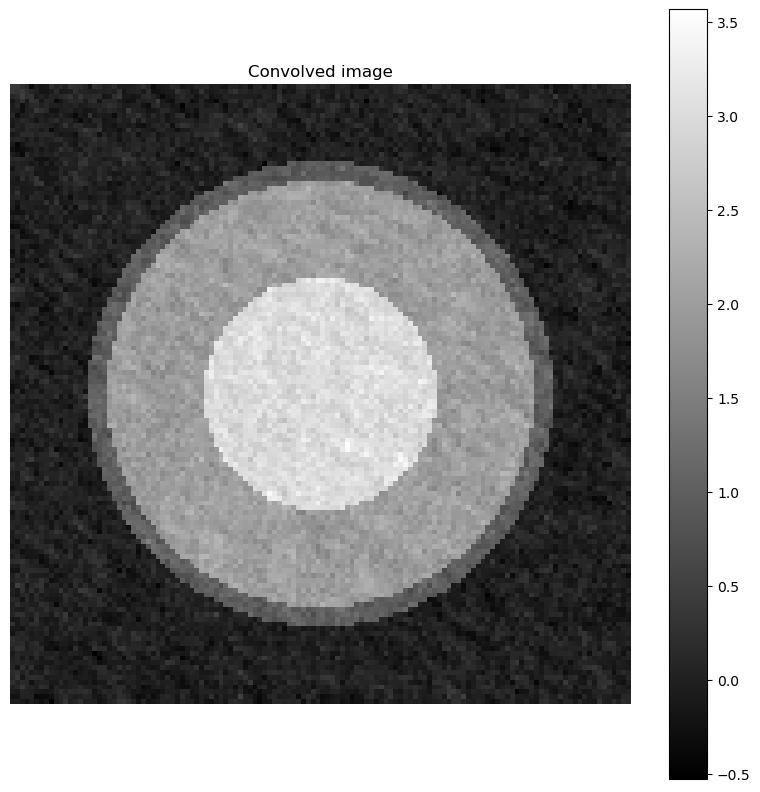

In [276]:
ker = ccf.random_kernel([1, 5, 5], allow_translations=True, distrib="gaussian")
eps = ccf.random_field_gaussian(mag.shape) * 0.5 * torch.rand([])
eps = ccf.conv(eps, ker)

conv = mag + eps

plt.figure(figsize=(10, 10))
plt.imshow(conv.squeeze(), cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Convolved image')
plt.colorbar()
plt.show()